# Load du lieu len

In [10]:
import sys
sys.path.append('../Common')

import CommonYFinance

symbol = 'VCB.VN'
from_date = '2023-11-01'
to_date = '2024-03-23'
interval = '1d'

data = CommonYFinance.CommonYFinance.loaddataYFinance(symbol, from_date, to_date, interval)

data

[*********************100%%**********************]  1 of 1 completed

Datetime     Open     High      Low    Close   Volume
0  2023-11-01  86800.0  87800.0  86100.0  87800.0  1550100
1  2023-11-02  88000.0  89000.0  86600.0  89000.0  1114500
2  2023-11-03  89000.0  89400.0  88100.0  88900.0  1157600
3  2023-11-06  88900.0  89800.0  88500.0  89500.0   833800
4  2023-11-07  89000.0  89300.0  88300.0  88300.0   518900
..        ...      ...      ...      ...      ...      ...
90 2024-03-18  94300.0  94500.0  92500.0  93000.0  1867500
91 2024-03-19  92500.0  93500.0  92500.0  92500.0  1060100
92 2024-03-20  92500.0  94100.0  92500.0  93200.0   970900
93 2024-03-21  94000.0  95500.0  94000.0  95200.0  1694100
94 2024-03-22  95200.0  96800.0  95200.0  96400.0  1889000

[95 rows x 6 columns]

model = ARIMA(data['Close'], order=(5, 1, 0)): Lệnh này khởi tạo một mô hình ARIMA với dữ liệu đầu vào là cột 'Close' từ DataFrame data. Tham số order=(p, d, q) xác định cấu hình của mô hình, nơi:

p: số lượng lệnh tự hồi quy (AR terms). p = 5 nghĩa là mô hình sẽ xem xét 5 giá trị trước đó trong chuỗi để dự đoán giá trị hiện tại.
d: bậc của phép tích phân (I for Integrated), giúp làm cho chuỗi trở nên dừng. d = 1 chỉ ra rằng dữ liệu nên được chuyển đổi một lần (sử dụng sai phân) để đạt được tính dừng.
q: số lượng lệnh trung bình động (MA terms). q = 0 nghĩa là không có lệnh MA nào được sử dụng trong mô hình.

# Chay mo hinh du doan gia tuong lai

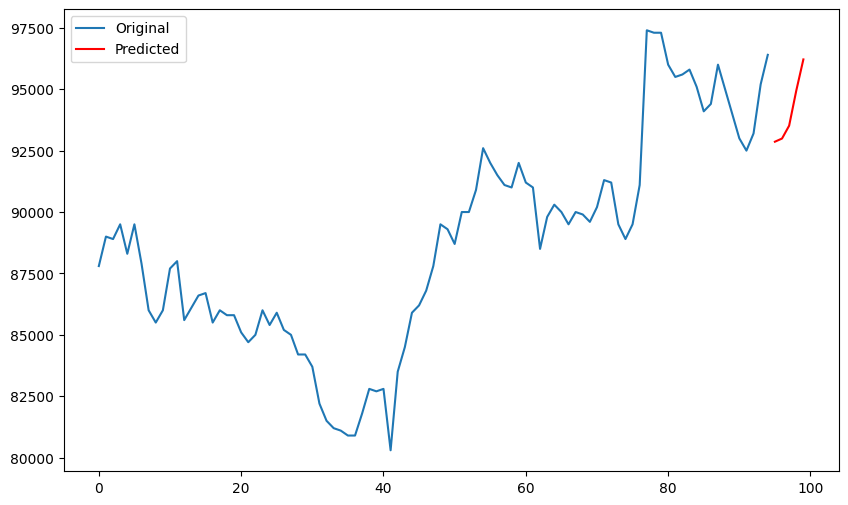

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Chọn các cột làm biến ngoại sinh (exogenous variables)
exog = data[['Open', 'High', 'Low', 'Volume']]

# Xây dựng mô hình SARIMAX
# order và seasonal_order được chọn dựa trên các phương pháp tối ưu hóa trước đó
model = SARIMAX(data['Close'], exog=exog, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# Dự đoán giá đóng cửa trong tương lai
# 'steps' là số lượng các bước thời gian để dự đoán phía trước
predictions = model_fit.forecast(steps=5, exog=exog.iloc[-5:])

# Trực Quan Hóa Kết Quả
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Original')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()


In [7]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA

# Đặt chỉ mục DataFrame với cột 'Datetime' có dữ liệu kiểu datetime
data.set_index('Datetime', inplace=True)

# Chọn các cột làm biến ngoại sinh (exogenous variables)
exog = data[['Open', 'High', 'Low', 'Volume']]

# Xây dựng mô hình SARIMAX
# order và seasonal_order được chọn dựa trên các phương pháp tối ưu hóa trước đó
model = SARIMAX(data['Close'], exog=exog, order=(1, 2, 0), seasonal_order=(2, 2, 2, 12))
model_fit = model.fit(disp=False)

# Dự đoán giá đóng cửa trong tương lai
# 'steps' là số lượng các bước thời gian để dự đoán phía trước
predictions = model_fit.forecast(steps=5, exog=exog.iloc[-5:])

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import plotly.graph_objects as go
# Tạo dãy ngày cho các dự đoán. Giả sử data.index[-1] là ngày cuối cùng trong dữ liệu của bạn
pred_dates = pd.date_range(start=data.index[-1], periods=6, freq='D')  # Thay đổi 'D' thành đơn vị thời gian mong muốn

# Trực Quan Hóa Kết Quả
# Tạo biểu đồ mới với thư viện Plotly
fig = go.Figure()

# Thêm dữ liệu giá đóng cửa gốc vào biểu đồ
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Giá Đóng Cửa Gốc'))

# Thêm dữ liệu dự đoán vào biểu đồ
fig.add_trace(go.Scatter(x=pred_dates, y=predictions, mode='lines+markers', name='Dự Đoán'))

# Định cấu hình layout của biểu đồ
fig.update_layout(
    title='Dự Đoán Giá Cả Sử Dụng Mô Hình SARIMAX',
    xaxis_title='Thời Gian',
    yaxis_title='Giá Đóng Cửa',
    hovermode='x unified'
)

# Hiển thị biểu đồ
fig.show()

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PC-DELL-

# Toi uu hoa mo hinh SARIMAX voi p, d, q

In [4]:
import itertools
import statsmodels.api as sm
import pandas as pd

# Đảm bảo rằng 'data' là DataFrame và có 'Datetime' làm chỉ mục
# Ví dụ: data.set_index('Datetime', inplace=True)

# Xác định các phạm vi tham số cho SARIMAX
p = d = q = range(0, 3)  # Thường bắt đầu từ phạm vi nhỏ để tiết kiệm thời gian
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  # 12 cho giả sử dữ liệu theo tháng

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

exog = data[['Open', 'High', 'Low', 'Volume']]  # Các biến ngoại lai

for param in itertools.product(p, d, q):
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['Close'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            exog=exog,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except:
            continue

print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} AIC:{best_aic}')


c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be 

Best SARIMAX(1, 2, 0)x(2, 2, 2, 12) AIC:20.0
